# Building two simple linear regression models

## Case 1: Prediction of flat prices

In the following we want to define a data frame from a simple csv file and build a linear regression model. The data presented by the file relates the number of square meters of flats to their prices. 

Notice: The required csv file is available in the repository.

In [6]:
#import necessary packages
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression #linear regression model

from sklearn.model_selection import train_test_split #train/test splitting of data

In [7]:
#define data frame
df = pd.read_csv("flatprices.csv")

#notice that an excel file would be defined via 
#df = pd.read_excel("filename.xlsx")
#notice that for a csv file with columns separated via ";" we use
#df = pd.read_csv("filename.csv", sep=";")

In [8]:
#print the entire data frame
#df

In [9]:
#print the head of the data frame
df.head()

,squaremeters,price
0,70,351000
1,72,390000
2,91,473000
3,58,282000
4,49,300000


In [10]:
#print a particular column of the data frame
#df["squaremeters"]

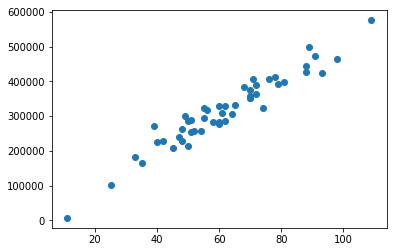

In [11]:
#plot the data frame as a scatter plot
plt.scatter(df["squaremeters"],df["price"])
plt.show()

In [12]:
#building the linear regression model
model = LinearRegression()
X = df[["squaremeters"]]             #notice the double brackets to bring the data frame column into the right shape
Y = df[["price"]]
model.fit(X,Y)

#print the coefficients of "y=a * x + b"
print("Intercept: " + str(model.intercept_))
print("Coef: " + str(model.coef_))

Intercept: [3143.28481869]
Coef: [[5071.35242619]]


In [13]:
#compare df[["..."]]  to df["..."]
#df[["squaremeters"]]
#df["squaremeters"]

In [14]:
#from the coefficients we can define the model to make predictions
# manually, we proceed via
#y = 5071.35242619 * x + 3143.28481869
#print an example where the result is rounded
print(round(5071.35242619 * 45 + 3143.28481869,2))

231354.14


In [15]:
#we can also automate this prediction of prices
min_x = min(df["squaremeters"])
max_x = max(df["squaremeters"])

predicted = model.predict([[min_x],[max_x]])
#round(model.predict([[min_x],[max_x]])[0][0])
#round(model.predict([[min_x],[max_x]])[1][0])

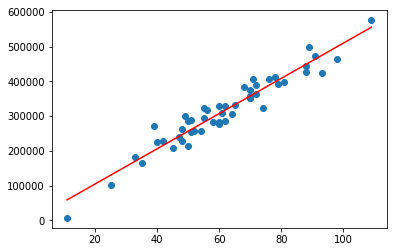

In [16]:
#plot these predictions superimposed oer the data frame
plt.scatter(df["squaremeters"], df["price"])
plt.plot([min_x,max_x],predicted,color = "red")
plt.show()

In the following we would like to split the data into training and test set and redo our analysis:

In [18]:
#define X,Y from data frame
X = df[["squaremeters"]].values #to generate numpy array, check via type(X)
Y = df[["price"]].values

In [22]:
#split X and Y into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.25) #random_state = 0 (could be any integer) # test_size =... to define train/test set ratio

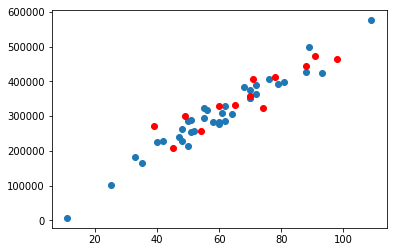

In [24]:
#vizialize training data vs. test data
plt.scatter(X_train,Y_train)
plt.scatter(X_test,Y_test, color="red")
plt.show()

In [25]:
#train the "mature" model using the split data
model = LinearRegression()
model.fit(X_train,Y_train)

#print the coefficients of "y=a * x + b"
print("Intercept: " + str(model.intercept_))
print("Coef: " + str(model.coef_))

Intercept: [-11170.16669668]
Coef: [[5282.55588241]]


We observe that the coefficients differ from the previously computed ones due to the splitting of the data.

In the following we want to graphically compare the predicted values to the remaining test intances:

In [27]:
#predicted Y data from X_test according to our model
predicted = model.predict(X_test)

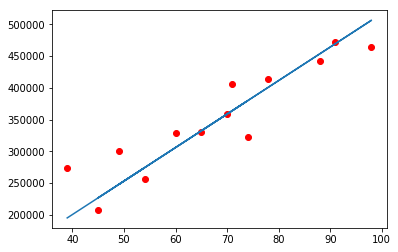

In [28]:
#visualize X_test,Y_test vs X_test, predicted to check model
plt.scatter(X_test,Y_test, color ="red")
plt.plot(X_test, predicted)
plt.show()

## Case 2: Prediction of car prices

In the following we want to define a data frame from a simple csv file and build a linear regression model. The data presented by the file relates the number of driven kilometers of cars to their prices.

Notice: The required csv file is available in the repository.

In [31]:
#define data frame
df = pd.read_csv("cars_prepared.csv")

In [32]:
#print the head of the data frame
df.head()

,price,yearOfRegistration,powerPS,kilometer,model,fuelType,name
0,1450,1997,75,90000,andere,benzin,Toyota_Toyota_Starlet_1._Hand__TÜV_neu
1,13100,2005,280,5000,golf,benzin,R32_tauschen_oder_kaufen
2,4500,2008,87,90000,yaris,benzin,Toyota_Yaris_1.3_VVT_i
3,6000,2009,177,125000,3er,diesel,320_Alpinweiss_Kohlenstoff
4,3990,1999,118,90000,3er,benzin,BMW_318i_E46_+++_1._Hand_+++_Liebhaberfahrzeug


In [33]:
#print a particular column of the data frame
#df["price"]
#df["kilometer"]

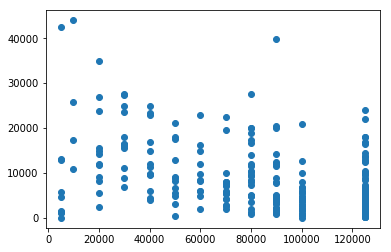

In [34]:
#plot the data frame as a scatter plot
plt.scatter(df["kilometer"],df["price"])
plt.show()

In [35]:
#building the linear regression model
model = LinearRegression()
X = df[["kilometer"]]             #notice the double brackets to bring the data frame column into the right shape
Y = df[["price"]]
model.fit(X,Y)

#print the coefficients of "y=a * x + b"
print("Intercept: " + str(model.intercept_))
print("Coef: " + str(model.coef_))

Intercept: [15988.72674252]
Coef: [[-0.0879714]]


In [36]:
#we can also automate this prediction of prices
min_x = min(df["kilometer"])
max_x = max(df["kilometer"])

predicted = model.predict([[min_x],[max_x]])
#round(model.predict([[min_x],[max_x]])[0][0])
#round(model.predict([[min_x],[max_x]])[1][0])

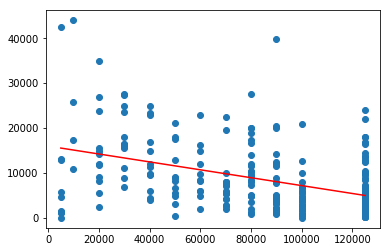

In [37]:
#plot these predictions superimposed oer the data frame
plt.scatter(df["kilometer"], df["price"])
plt.plot([min_x,max_x],predicted,color = "red")
plt.show()

In [38]:
#According to the model, what is the price of a car which has driven 55000 km?
model.predict([[0],[55000]])
round(model.predict([[min_x],[max_x]])[1][0])


4992.0

Notice that according to our model the value of a car decreases by about 9 cents per driven kilometer!

In the following we would like to split the data into training and test set and redo our analysis:

In [39]:
#define X,Y from data frame
X = df[["kilometer"]].values #to generate numpy array, check via type(X)
Y = df[["price"]].values

#split X and Y into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.25) #random_state = 0 (could be any integer) # test_size =... to define train/test set ratio

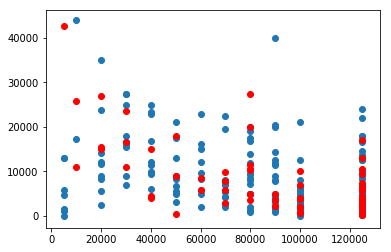

In [40]:
#vizialize training data vs. test data
plt.scatter(X_train,Y_train)
plt.scatter(X_test,Y_test, color="red")
plt.show()

In [42]:
#train the "mature" model using the split data
model = LinearRegression()
model.fit(X_train,Y_train)

#print the coefficients of "y=a * x + b"
print("Intercept: " + str(model.intercept_))
print("Coef: " + str(model.coef_))

Intercept: [14971.46689814]
Coef: [[-0.07581664]]


We observe that the coefficients differ from the previously computed ones due to the splitting of the data.

In the following we want to graphically compare the predicted values to the remaining test intances:

In [43]:
#predicted Y data from X_test according to our model
predicted = model.predict(X_test)

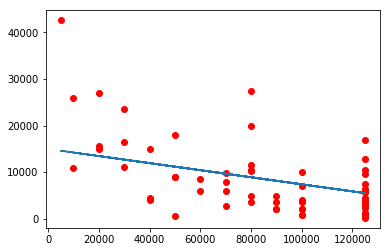

In [44]:
#visualize X_test,Y_test vs X_test, predicted to check model
plt.scatter(X_test,Y_test, color ="red")
plt.plot(X_test, predicted)
plt.show()